In [1]:
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
from matplotlib.ticker import FormatStrFormatter
from datetime import datetime
import gmaps
import gmaps.datasets
from pyproj import Proj, transform
import seaborn as sns
from matplotlib.pyplot import figure
sns.set(color_codes=True)
from datetime import date
from datetime import time

In [5]:
df = pd.read_csv("out2.csv")
agency = pd.read_csv("agency code.csv")

C:\Users\Aihua Chen\anaconda\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
del df["Unnamed: 0"]

In [350]:
df.shape

(1997938, 21)

In [25]:
df.isnull().sum()

Ticket number                 0
Issue Date                    0
Issue time                  529
RP State Plate                0
Plate Expiry Date        193830
Make                       1839
Body Style                 2218
Color                       915
Location                     91
Route                     15248
Agency                        4
Violation code                0
Violation Description       263
Fine amount                1649
Latitude                      2
Longitude                     2
year                          0
dtype: int64

In [28]:
from datetime import datetime
df['Issue Date'] = pd.to_datetime(df['Issue Date'])
df.head()

,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,year
0,4320468924,2018-01-13,26.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018
1,4320468935,2018-01-13,27.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,5200,DISPLAY OF PLATES,25.0,6.499186e+06,1.866284e+06,2018
2,4320468946,2018-01-13,27.0,CA,201804.0,FORD,PA,SL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018
3,4320468950,2018-01-13,28.0,CA,201812.0,FORD,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018
4,4320468961,2018-01-13,29.0,CA,201806.0,TOYT,PA,BK,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018


In [32]:
df['Month'] = df['Issue Date'].map(lambda x: str(x).split('-')[1])
df['Day'] = df['Issue Date'].map(lambda x: str(x).split('-')[2])
df['Day'] = df['Day'].str.strip('T00:00:00')
df['Day'] = df['Day'].apply(lambda x: str(int(x)).zfill(2))
df.head()

,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,year,Month,Day
0,4320468924,2018-01-13,26.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,01,13
1,4320468935,2018-01-13,27.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,5200,DISPLAY OF PLATES,25.0,6.499186e+06,1.866284e+06,2018,01,13
2,4320468946,2018-01-13,27.0,CA,201804.0,FORD,PA,SL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,01,13
3,4320468950,2018-01-13,28.0,CA,201812.0,FORD,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,01,13
4,4320468961,2018-01-13,29.0,CA,201806.0,TOYT,PA,BK,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,01,13


In [33]:
df['Fine amount'].sum()

140372757.0

# Citation Fine Total Dollar Amount Analysis

During 2018, \\$140,372,757 in fines were issued. During the year,the month of March had the highest amount issued with over \\$13,543,000 issued and September was the lowest with \\$9.9 million issued. There was a noticeable trend downward as the year went on, with the lower amount volumes coming at the end of the year.

In [34]:
month_tally = df.groupby(['Month'])
fine_avg = month_tally['Fine amount'].mean()
total_fines = month_tally['Fine amount'].sum()
fine_sum = pd.DataFrame({'Total Fines Issued': round(total_fines, 2).astype(float).map("${:,.2f}".format),
                         'Average Fine': round(fine_avg, 2).astype(float).map("${:,.2f}".format)
                             })
fine_sum

,Total Fines Issued,Average Fine
Month,,
01,"$13,062,682.00",$69.51
02,"$11,626,263.00",$69.90
03,"$13,543,268.00",$70.13
04,"$13,276,779.00",$70.22
05,"$12,779,563.00",$70.25
06,"$11,853,053.00",$70.74
07,"$10,561,848.00",$70.96
08,"$11,934,723.00",$70.18
09,"$9,914,194.00",$69.97


<Figure size 800x800 with 0 Axes>

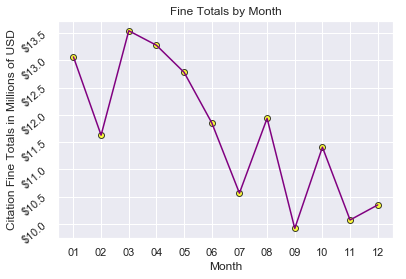

In [35]:
#scatter plot
my_dpi=96
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)

fine_avg2 = month_tally['Fine amount'].mean()
total_fines2 = month_tally['Fine amount'].sum()
fine_sum2 = pd.DataFrame({'Total Fines Issued in $': round(total_fines, 2),
                          #'Total Citation Count': total_citation,
                          'Average Fine': round(fine_avg, 2)
                             })
fig, ax = plt.subplots()

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
plt.yticks(rotation=40)
x=["$9.5","$10.0","$10.5",'$11.0','$11.5','$12.0','$12.5','$13.0','$13.5']
ax.set_yticklabels(x)
plt.scatter(fine_sum2.index.values, fine_sum2['Total Fines Issued in $'], color= 'yellow', edgecolor = 'black', alpha = .75)
plt.plot(fine_sum2.index.values, fine_sum2['Total Fines Issued in $'], color = 'purple')
plt.title('Fine Totals by Month')
plt.ylabel('Citation Fine Totals in Millions of USD')
plt.xlabel('Month')
plt.grid(True)
plt.savefig('Images/FineTotals.jpg', dpi=1000)
plt.show()

# Monthly Citations Analysis

During this year, the citations issued per month showed a less noticeable trend compared to the fine total breakdown by month.

In [36]:
citation_month = month_tally['Month'].count()
citation_month_df = pd.DataFrame({'Citations Count': citation_month})
citation_month_df

,Citations Count
Month,
01,188033
02,166386
03,193226
04,189197
05,182153
06,167759
07,148978
08,170184
09,141802


<Figure size 800x800 with 0 Axes>

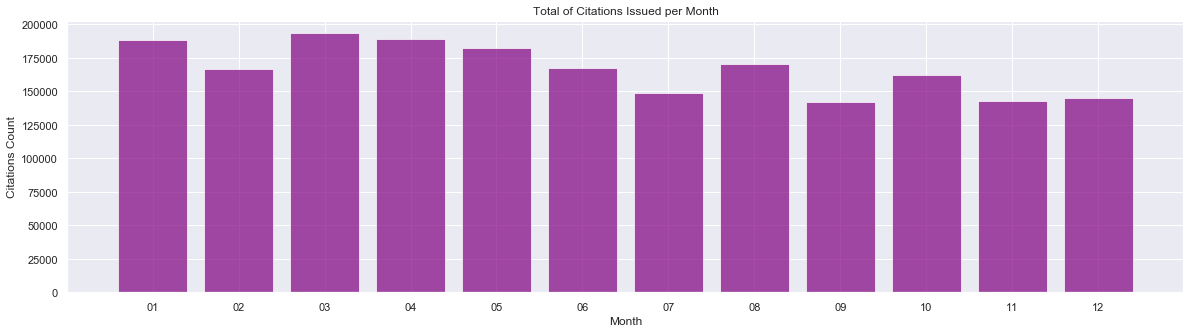

In [38]:
#monthly bar chart
x_axis = np.arange(len(citation_month))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.figure(figsize=(20,5))
plt.bar(x_axis, citation_month, color='purple', alpha=0.7, align="edge")
plt.xticks(tick_locations, citation_month.index.values)
plt.title("Total of Citations Issued per Month")
plt.xlabel("Month")
plt.ylabel("Citations Count")
plt.grid(True)
plt.savefig('Images/CitationsPerMonth.jpg', dpi = 1000)

# Daily Citations Analysis

The daily breakdown of citations showed that the most active day for citations was on the 13th of the month during 2018.  74983 tickets were issued collectively on that day.  Ignoring the 31st which doesnt fall on everymonth, the 1st was the day with least citations issues with 56094.  But there wasnt a recognizeable trend up or down at any particular time during the month.

In [39]:
day_tally = df.groupby(['Day'])
citation_day = day_tally['Day'].count()
citation_day_df = pd.DataFrame({'Citations Count': citation_day})
citation_day_df

,Citations Count
Day,
01,56094
02,68785
03,65400
04,62035
05,70685
06,67686
07,59088
08,58923
09,66678


<Figure size 800x800 with 0 Axes>

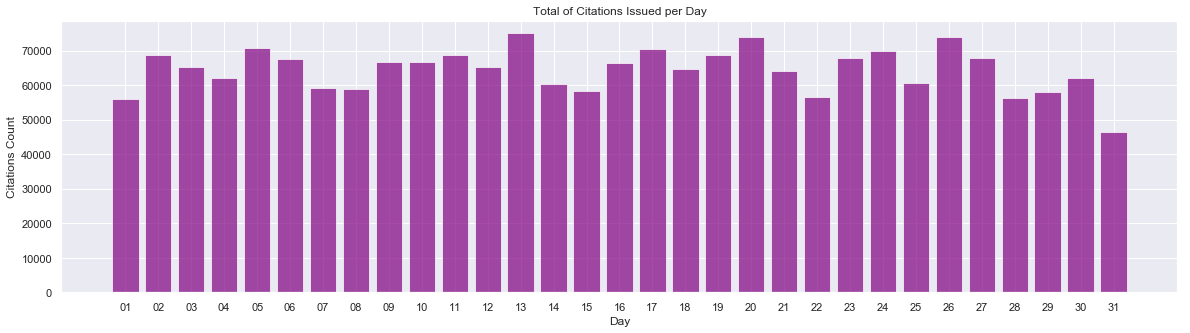

In [40]:
#daily bar chart
x_axis = np.arange(len(citation_day))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
plt.figure(figsize=(20,5))
plt.bar(x_axis, citation_day, color='purple', alpha=0.7, align="edge")
plt.xticks(tick_locations, citation_day.index.values)
plt.title("Total of Citations Issued per Day")
plt.xlabel("Day")
plt.ylabel("Citations Count")
plt.grid(True)
plt.savefig('Images/CitationsPerDay.jpg', dpi =1000)

# Violation Type analysis

- Analysis was done to check the highest violation in LA and how much revenue was generated from it for 2018.

In [50]:
cases = df.groupby('Violation code')['Violation Description'].apply(lambda x: set(list(x))).to_frame()
cases['unique_desc'] = cases['Violation Description'].map(lambda x: len(x))
cases.sort_values(by='unique_desc', ascending=False)

def clean_the_code(some_code):
    return some_code.replace(".", "").replace("*", "").replace("+", "")

cases['clean_code'] = cases.index.map(clean_the_code)
cases.head()

,Violation Description,unique_desc,clean_code
Violation code,,,
000,"{nan, 806911, 22502B2, 80391B, 52011C, 5203A, ...",218,000
001,{21113A},1,001
002,{4000A},1,002
005,{21461},1,005
006,{22500A},1,006


In [51]:
code_lookup = dict(zip(cases.index, cases.clean_code))
clean_df = df.copy(deep=True)
clean_df['clean_code_mapped'] = clean_df['Violation code'].map(lambda x: code_lookup.get(x, "Checkmelater"))
clean_df.head()

,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,year,Month,Day,clean_code_mapped
0,4320468924,2018-01-13,26.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,01,13,8069B
1,4320468935,2018-01-13,27.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,56.0,5200,DISPLAY OF PLATES,25.0,6.499186e+06,1.866284e+06,2018,01,13,5200
2,4320468946,2018-01-13,27.0,CA,201804.0,FORD,PA,SL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,01,13,8069B
3,4320468950,2018-01-13,28.0,CA,201812.0,FORD,PA,BL,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,01,13,8069B
4,4320468961,2018-01-13,29.0,CA,201806.0,TOYT,PA,BK,5033 LINCOLN AVE,00611,56.0,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,01,13,8069B


In [58]:
clean_df['clean_code_mapped']  = clean_df['clean_code_mapped'].replace({'8069A':'8069AA'})
group = clean_df.groupby('clean_code_mapped').agg({"Violation Description":"first","Ticket number":"count"}).sort_values(by='Ticket number',ascending=False)
group.head()

,Violation Description,Ticket number
clean_code_mapped,,
8069BS,NO PARK/STREET CLEAN,594541
8813B,METER EXP.,295527
8056E4,RED ZONE,166904
8058L,PREFERENTIAL PARKING,145586
5204A-,DISPLAY OF TABS,123414


In [61]:
group1 = group[group['Ticket number'] > 10000]
group1 = group1.set_index('Violation Description')
group1

,Ticket number
Violation Description,
NO PARK/STREET CLEAN,594541
METER EXP.,295527
RED ZONE,166904
PREFERENTIAL PARKING,145586
DISPLAY OF TABS,123414
NO PARKING,92220
PARKED OVER TIME LIMIT,63344
DISPLAY OF PLATES,58525
NO STOP/STAND,44388


<Figure size 800x800 with 0 Axes>

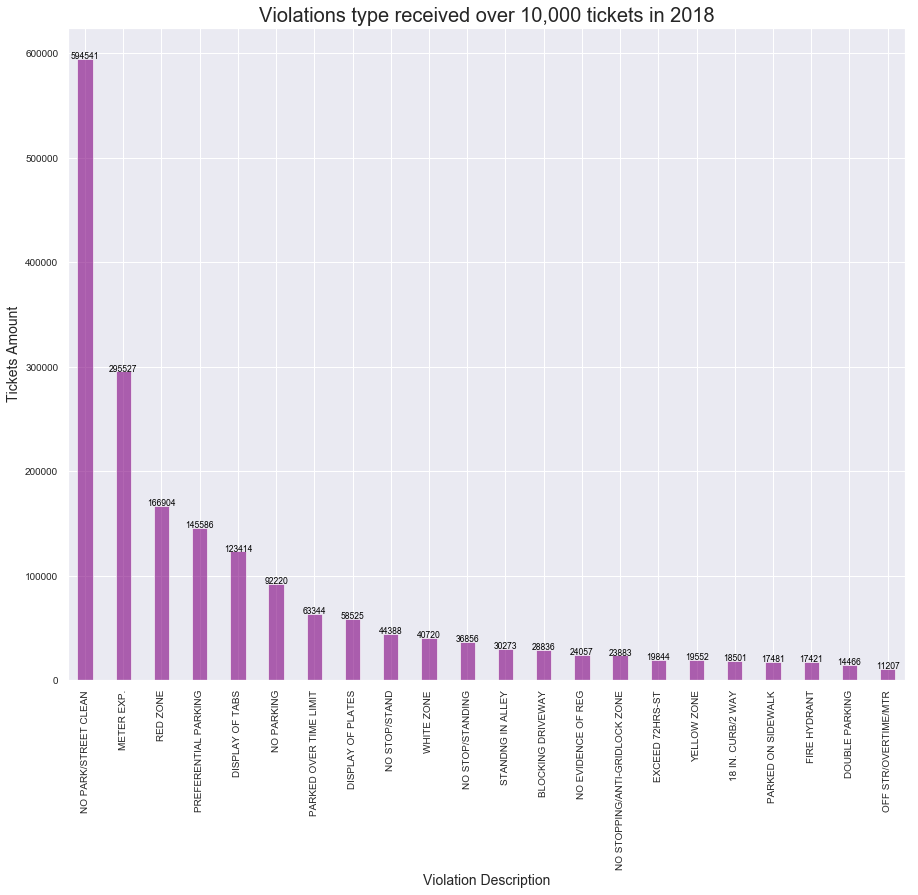

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt

my_dpi=96
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)

g = group1.plot(kind='bar',legend=False,color="purple",width=.4, alpha=0.6, figsize=(15,12), fontsize=10)
g.set_ylabel('Tickets Amount',fontsize=14)
g.set_xlabel('Violation Description',fontsize=14)
g.set_title("Violations type received over 10,000 tickets in 2018",fontsize=20)

rects = g.patches
labels = group1['Ticket number']

for rect, label in zip(rects, labels):
    g.text(rect.get_x() + rect.get_width() / 2, rect.get_height()+8, label,
               fontsize=8.5, color='black', ha='center')
    
plt.savefig('Images/ViolationTotal.jpg', dpi=1000)

# Agency vs Tickets and Revenue
- Analysis was done to check the agencies giving the most tickets and making the most revenue. It showed that DOT collected the majority of the tickets.

In [233]:
angency_dic = dict(zip(agency['Agency'],agency['AGENCY SHORT NAME']))
angency_dic

{1: 'WESTERN',
 2: 'LAX CUR',
 3: 'VALLEY',
 4: 'HOLLYWOOD',
 5: 'SOUTHERN',
 6: 'CENTRAL',
 7: 'HPV',
 8: 'AIRPT BACK',
 9: 'BANDIT CAB',
 10: 'LAPD BACK',
 11: 'VN AIRPORT',
 12: 'RANGERS',
 14: 'MARSH OFF.',
 15: 'PUB. UTIL.',
 16: 'ANIMAL REG',
 17: 'LASD CTY E',
 18: 'CNV CENTER',
 20: 'CHP',
 21: 'CA STATE P',
 22: 'CA PK & RE',
 34: 'G.S.D.',
 35: 'AMTRAK',
 40: 'BLDG & SAF',
 41: 'STREET USE',
 44: 'LIBRARY',
 50: 'DOT - HARB',
 51: 'DOT - WEST',
 52: 'DOT - WLSH',
 53: 'DOT - VALY',
 54: 'DOT - HLYW',
 55: 'DOT - STHN',
 56: 'DOT - CNTL',
 57: 'HAB VIOLS',
 58: 'SPEC EVENT',
 59: 'DOT-PLACRD',
 60: 'DOT-RESIDT',
 61: 'CORT METRO',
 62: 'CORT VALLE',
 63: 'EME DETAIL',
 64: 'SE HLYWD',
 65: 'SE SOUTH',
 66: 'SE CENTRAL',
 71: 'M ABATEMNT',
 72: 'V ABATEMNT',
 75: 'US FED PS',
 80: 'DOT - WEST',
 81: 'DOT - WILS',
 82: 'DOT-VALLEY',
 83: 'DOT-HLYWOD',
 84: 'DOT-SOUTH',
 85: 'DOT-CENTRL',
 86: 'HABIT VIOL',
 87: 'SPEC EVNTS',
 88: 'LAPD CURR',
 89: 'LAPD BACK',
 90: 'AIRPT CURR',

In [236]:
import warnings
warnings.simplefilter("ignore")\

df['Angency Name'] = df['Agency'].map(lambda x: angency_dic.get(x))

In [255]:
df.head()

,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,...,Violation code,Violation Description,Fine amount,Latitude,Longitude,year,Month,Day,Converted_Coordinates,Angency Name
0,4320468924,2018-01-13,26.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,...,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,01,13,"(34.12045910507622, -118.20643444842233)",DOT - CNTL
1,4320468935,2018-01-13,27.0,CA,201801.0,MERZ,PA,BL,5033 LINCOLN AVE,00611,...,5200,DISPLAY OF PLATES,25.0,6.499186e+06,1.866284e+06,2018,01,13,"(34.12045910507622, -118.20643444842233)",DOT - CNTL
2,4320468946,2018-01-13,27.0,CA,201804.0,FORD,PA,SL,5033 LINCOLN AVE,00611,...,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,01,13,"(34.12045910507622, -118.20643444842233)",DOT - CNTL
3,4320468950,2018-01-13,28.0,CA,201812.0,FORD,PA,BL,5033 LINCOLN AVE,00611,...,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,01,13,"(34.12045910507622, -118.20643444842233)",DOT - CNTL
4,4320468961,2018-01-13,29.0,CA,201806.0,TOYT,PA,BK,5033 LINCOLN AVE,00611,...,80.69B,NO PARKING,73.0,6.499186e+06,1.866284e+06,2018,01,13,"(34.12045910507622, -118.20643444842233)",DOT - CNTL


In [351]:
result = df.groupby('Angency Name')\
.agg({'Fine amount':'sum', "Ticket number" : "count"})\
.sort_values(by='Fine amount',ascending=False)
result

,Fine amount,Ticket number
Angency Name,,
DOT - HLYW,33801614.0,483985
DOT - CNTL,29786130.0,423240
DOT - WEST,29087748.0,424144
DOT - VALY,26104656.0,372731
DOT - STHN,16075183.0,214842
WESTERN,3492835.0,48958
LAX CUR,806762.0,12277
HOLLYWOOD,444381.0,6775
HAB VIOLS,346132.0,5176


In [286]:
result['Fine Percentage (%)'] = result['Fine amount'].map(lambda x: '{:.5f}'.format(x/result['Fine amount'].sum()*100))
result

,Fine amount,Ticket number,Fine Percentage (%)
Angency Name,,,
DOT - HLYW,33801614.0,483985,24.09693
DOT - CNTL,29786130.0,423240,21.23432
DOT - WEST,29087748.0,424144,20.73645
DOT - VALY,26104656.0,372731,18.60982
DOT - STHN,16075183.0,214842,11.45988
WESTERN,3492835.0,48958,2.49002
LAX CUR,806762.0,12277,0.57513
HOLLYWOOD,444381.0,6775,0.31680
HAB VIOLS,346132.0,5176,0.24676


# Hourly and Hourly VS Violations Analysis
The graph shows a drastic jump in issued tickets starting at 8am and lasting throughout noon, wherafter the number of citations start to decrease. Most of the citations were issued at 8am, 10am, and noon. And we were able to see some correlations between certain violation types and hours, for instance, "NO PARK/STREET CLEAN" violation happened most frequently around 8am to 1pm. "PREFERENTIAL PARKING" violation happened most frequently around 6pm to 8pm.

In [323]:
hourly = clean_df.copy(deep=True)

In [324]:
hourly.replace(["NaN", 'NaT'], np.nan, inplace = True)
hourly = hourly.dropna()

#check Nan values were dropped from Issue Time column

hourly[hourly["Issue time"].isnull()]

,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude,year,Month,Day,clean_code_mapped


In [325]:
hourly['Issue time'] = hourly['Issue time'].apply(lambda x: str(int(x)).zfill(4))
hourly['Issue time'] = hourly['Issue time'].map(lambda x: str(x)[:-2])
hourly["Issue time"].sample(10)

1377239    11
802561     10
75952      14
727995     08
984967     12
1442272    09
1232681    03
804437     21
258743     13
1572240    17
Name: Issue time, dtype: object

In [326]:
newdf = hourly.groupby("Issue time").agg({"Ticket number":"count"}).sort_values(by='Ticket number', ascending=False)
newdf

,Ticket number
Issue time,
08,231627
12,231167
10,221466
11,151966
09,117223
13,107136
16,79640
14,77396
18,57431


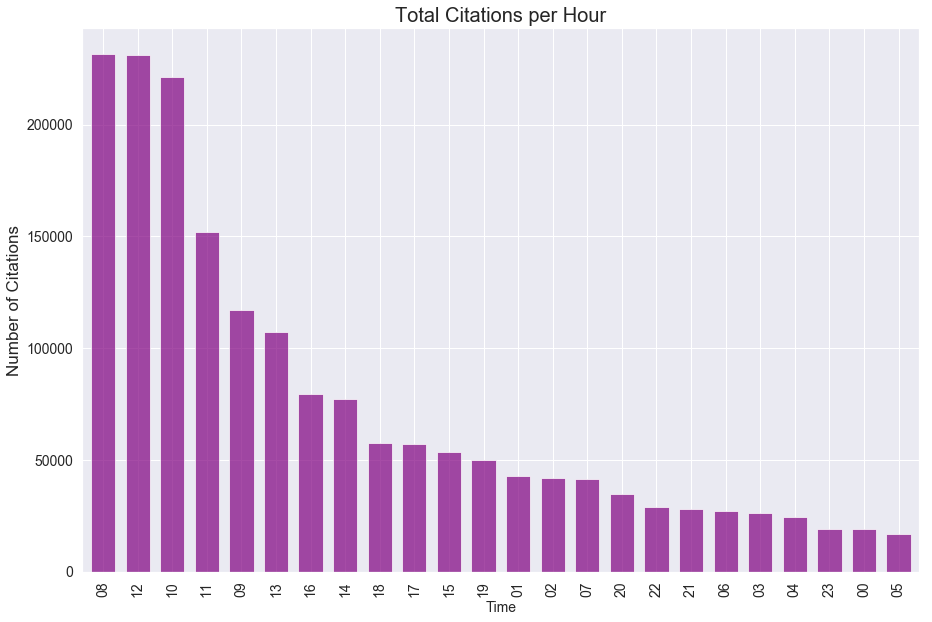

In [327]:
newdf.plot(kind='bar',legend=False,color="purple",width=.7, alpha=0.7, figsize=(15,10), fontsize=14)
plt.xlabel("Time",fontsize=14)
plt.ylabel("Number of Citations",fontsize=17)
plt.title("Total Citations per Hour",fontsize=20)

plt.savefig("hourly_citations.png")

plt.show()

In [348]:
group_by_code = hourly.groupby(['clean_code_mapped','Issue time']) \
.agg({"Violation Description":"first","Ticket number":"count",})
group_by_code[group_by_code['Ticket number'] > 10000]
# We visualized this info with Tableau

Violation Description  Ticket number
clean_code_mapped Issue time                                               
5204A-            08                         DISPLAY OF TABS          10949
                  10                         DISPLAY OF TABS          11939
                  11                         DISPLAY OF TABS          11351
                  12                         DISPLAY OF TABS          13038
8056E4            01                                RED ZONE          11368
                  02                                RED ZONE          10035
                  11                                RED ZONE          13330
                  12                                RED ZONE          12184
8058L             18                    PREFERENTIAL PARKING          22833
                  19                    PREFERENTIAL PARKING          12063
                  20                    PREFERENTIAL PARKING          13685
8069AP            16                        NO STOP/STANDING          10419
8069BS            08                    NO PARK/STREET CLEAN         160613
                  09                    NO PARK/STREET CLEAN          54284
                  10                    NO PARK/STREET CLEAN         130567
                  11                    NO PARK/STREET CLEAN          35329
                  12                    NO PARK/STREET CLEAN         121544
                  13                    NO PARK/STREET CLEAN          20769
8069C             11                  PARKED OVER TIME LIMIT          10263
                  12                  PARKED OVER TIME LIMIT          10042
8070              16          NO STOPPING/ANTI-GRIDLOCK ZONE          10495
8813B             08                           METER EXPIRED          19634
                  09                           METER EXPIRED          13391
                  10                           METER EXPIRED          22626
                  11                              METER EXP.          36144
                  12                              METER EXP.          31788
                  13                              METER EXP.          26508
                  14                              METER EXP.          23467
                  15                              METER EXP.          16045
                  16                              METER EXP.          20468
                  17                              METER EXP.          21043
                  18                              METER EXP.          11121
                  19                              METER EXP.          16528

# Weekdays VS Weekends Analysis
The graph shows a leveled number of ticket accross the workweek. Just about a 1/4 of the daily citations happened on Saturday and Sunday individually. Tuesday saw the most citations by about 25,000 more than Wednesday or Thursday.

In [309]:
weekly = df.copy(deep=True)

In [311]:
weekly['Issued Date'] = weekly['Issue Date'].map(lambda x: str(x)[:-9])
weekly["Issued Date"] = pd.to_datetime(weekly['Issued Date'])

In [312]:
#get day of week from date

weekly['Day'] = weekly['Issued Date'].dt.dayofweek

#verify change

weekly.sample(10)

,Ticket number,Issue Date,Issue time,RP State Plate,Plate Expiry Date,Make,Body Style,Color,Location,Route,...,Violation Description,Fine amount,Latitude,Longitude,year,Month,Day,Converted_Coordinates,Angency Name,Issued Date
1275136,4337971061,2018-08-08,1109.0,CA,201803.0,VOLK,PA,BL,1132 CROCKER ST S,00600,...,DISPLAY OF TABS,25.0,6.485452e+06,1.834555e+06,2018,08,2,"(34.033188408267165, -118.25155000089406)",DOT - CNTL,2018-08-08
1765530,4343506285,2018-11-13,847.0,CA,201903.0,VOLK,PA,GN,1226 HOLT AVE,00146,...,NO PARK/STREET CLEAN,73.0,6.447052e+06,1.842879e+06,2018,11,1,"(34.05572873398229, -118.3783936888646)",DOT - WEST,2018-11-13
1200678,4336370135,2018-07-24,1332.0,IL,201808.0,HOND,PA,WT,1001 MAIN ST S,00642,...,METER EXP.,63.0,6.483893e+06,1.837204e+06,2018,07,1,"(34.04045500011707, -118.25671600037091)",DOT - CNTL,2018-07-24
1716381,4342589366,2018-11-02,917.0,CA,201904.0,VOLV,PA,BL,2201 PURDUE AV,101R,...,WHITE ZONE,58.0,6.427404e+06,1.836161e+06,2018,11,4,"(34.037047997589696, -118.44316200223663)",DOT - WEST,2018-11-02
1520958,4340545145,2018-09-26,1045.0,CA,201907.0,HOND,PA,RD,8215 WHITSETT AVE,00352,...,NO PARK/STREET CLEAN,73.0,6.439157e+06,1.902732e+06,2018,09,2,"(34.22011142895348, -118.40525300490425)",DOT - VALY,2018-09-26
988672,4332471920,2018-06-13,1816.0,CA,201811.0,MERZ,PA,GY,1545 NORTH LAS PALMAS AVENUE,402A,...,PREFERENTIAL PARKING,68.0,6.459850e+06,1.858490e+06,2018,06,2,"(34.09875104048523, -118.33631224469943)",DOT - HLYW,2018-06-13
192872,4326122231,2018-01-31,830.0,CA,201809.0,HOND,PA,SL,5545 WILLOW CREST AVE,00354,...,NO PARK/STREET CLEAN,73.0,6.451974e+06,1.884797e+06,2018,01,2,"(34.17096394012341, -118.36264369962538)",DOT - VALY,2018-01-31
279848,4326268505,2018-02-06,321.0,CA,201712.0,TOYT,PA,SL,2660 POMEROY AVE,00600,...,PARKED IN PARKWAY,63.0,6.501619e+06,1.841906e+06,2018,02,1,"(34.05348724041135, -118.19823851043692)",DOT - CNTL,2018-02-06
443425,4327973333,2018-03-20,2110.0,CA,201709.0,TOYT,PA,WT,1600 ORANGE DR,402A,...,DISPLAY OF TABS,25.0,6.458313e+06,1.858944e+06,2018,03,1,"(34.09998517202922, -118.34139465503273)",DOT - HLYW,2018-03-20
1916526,4344836031,2018-12-14,200.0,AZ,NaN,FORD,PA,WT,1068 HAYWORTH AVE,504A,...,COMM VEH OVER TIME LIMIT,78.0,6.450908e+06,1.843190e+06,2018,12,4,"(34.05662373232473, -118.36566698989508)",DOT - WEST,2018-12-14


In [315]:
newdf1 = weekly.groupby("Day").agg({"Ticket number":"count"}).sort_values(by='Ticket number', ascending=False)
newdf1

,Ticket number
Day,
1,397653
3,378566
2,375300
0,333201
4,313611
6,100982
5,98625


In [319]:
newdf1 = newdf1.rename(index={0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"})
newdf1

,Ticket number
Day,
Tuesday,397653
Thursday,378566
Wednesday,375300
Monday,333201
Friday,313611
Sunday,100982
Saturday,98625


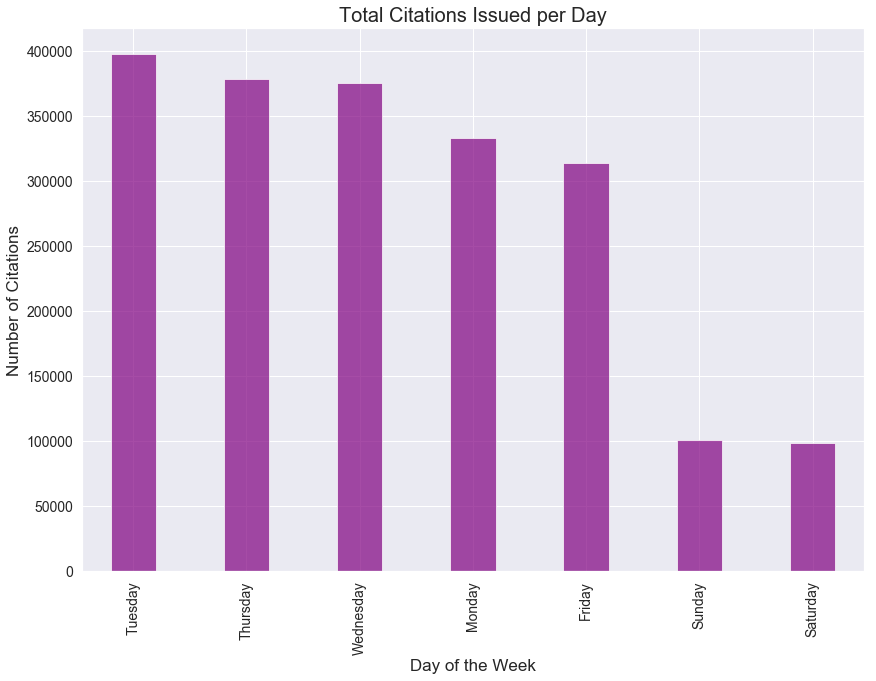

In [320]:
newdf1.plot(kind='bar',legend=False,color="purple",width=.4, alpha=0.7, figsize=(14,10), fontsize=14)
plt.xlabel("Day of the Week",fontsize=17)
plt.ylabel("Number of Citations",fontsize=17)
plt.title("Total Citations Issued per Day",fontsize=20)

plt.savefig("daily_citations.png")
plt.show()